# Table of content
* [Imports and loading dataset](#import-load)
* [Exploration of the dataset](#data-exploration)
* [Engineering the features](#feature-engineering)
* [Model creation and fitting](#model-learning)

    -[imports and functions](#model-learning-top)
    
    -[setup](#model-learning-setup)

# IMPORT & LOAD<a class="anchor" id="import-load"></a>

In [160]:
####Import libraries
# SQL
import sqlite3
# Data Manipulation
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno   #NaNs
#Nice Tables
from ipy_table import *

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [150]:
#load data (make sure you have downloaded database.sqlite)
with sqlite3.connect(r'C:/Users/ernest.chocholowski/Desktop/Datasets/Soccer/database.sqlite') as con:
    country_df = pd.read_sql_query("SELECT * from Country", con)
    matches_df = pd.read_sql_query("SELECT * from Match", con)
    league_df = pd.read_sql_query("SELECT * from League", con)
    team_df = pd.read_sql_query("SELECT * from Team", con)
    player_df = pd.read_sql_query("select * from Player", con)

#load past results
super_table=[["Name", 'Regression function', "Train Acc", 'Validation Acc', "r2_score", "conf_matrix", 'Cross-Valid.'],]
df_load = pd.read_csv(r'C:/Users/ernest.chocholowski/Desktop/GIT/SoccerAnalysis/out/results_table.csv')
for row in df_load.values.tolist():
    super_table.append(row)

In [151]:
all_df = [country_df, matches_df, league_df, team_df, player_df]
country_df.dfname = 'country_df'
matches_df.dfname = 'matches_df'
league_df.dfname = 'league_df' 
team_df.dfname = 'team_df' 
player_df.dfname = 'player_df'

# DATA EXPLORATION<a class="anchor" id="data-exploration"></a>

In [152]:
for df in all_df:
    print(df.dfname)
    print(df.info())
    print('-'*40)

country_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
----------------------------------------
matches_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None
----------------------------------------
league_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
None
----------------------------------------
team_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
tea

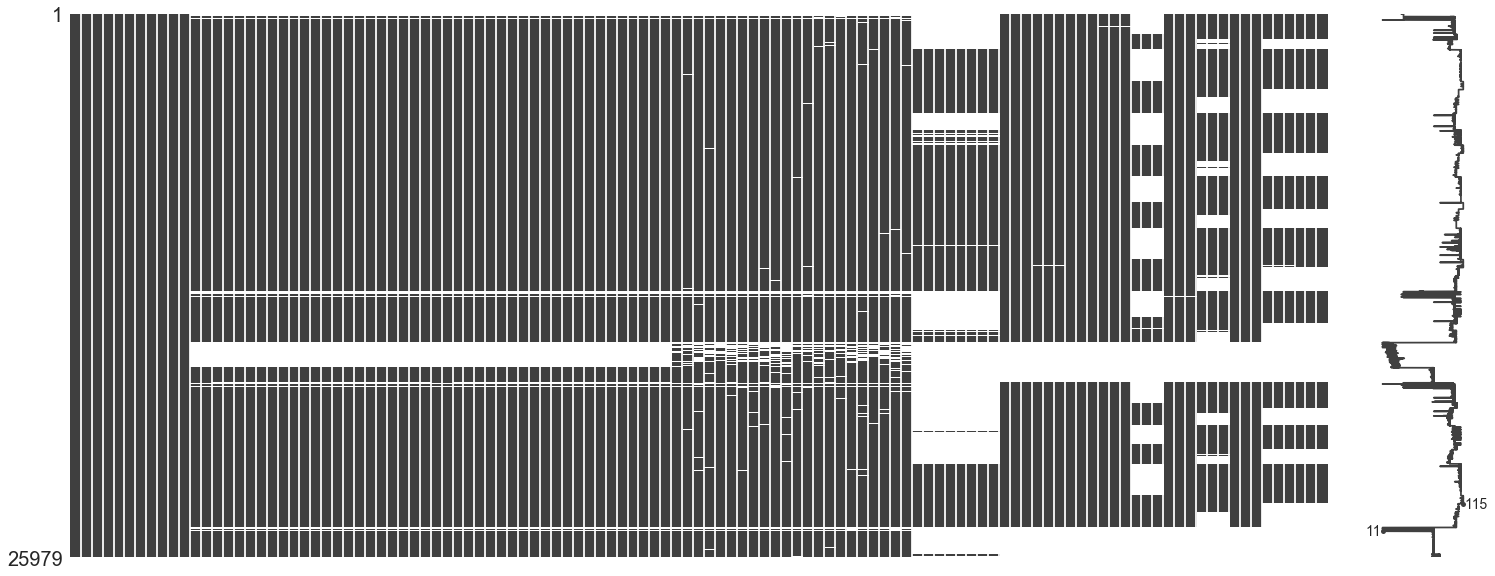

In [70]:
msno.matrix(matches_df)

In [153]:
matches_df.dropna(thresh=80, inplace=True)

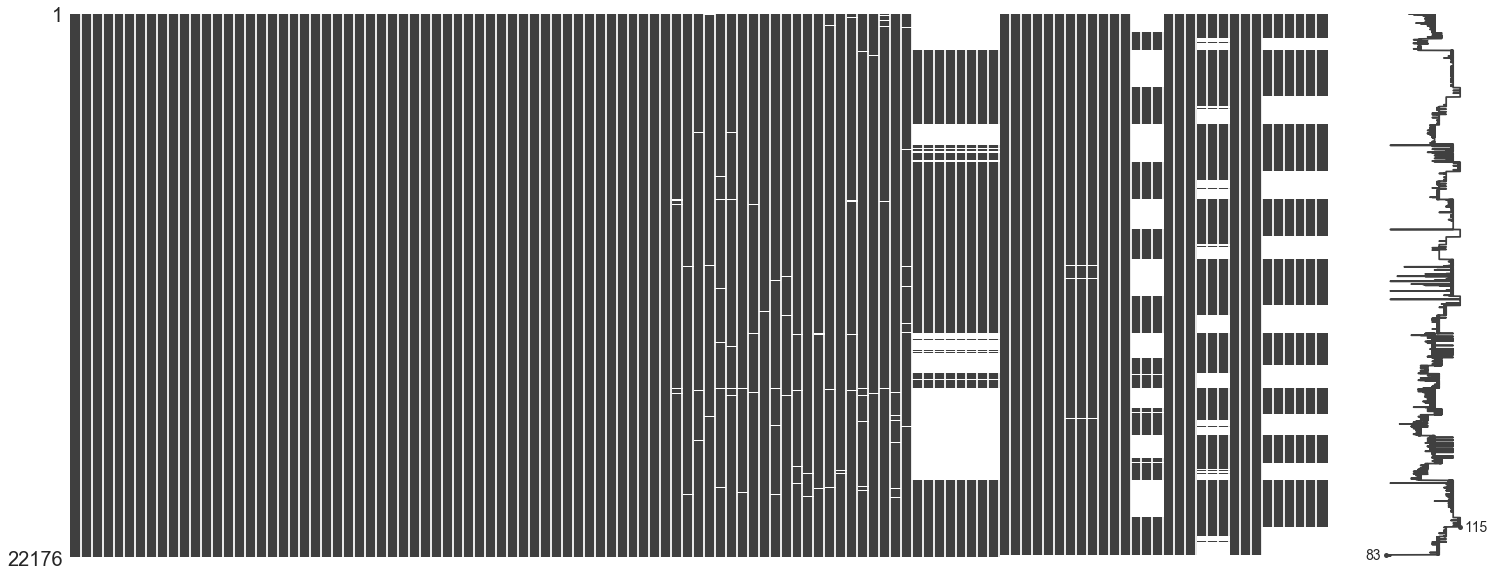

In [154]:
msno.matrix(matches_df)

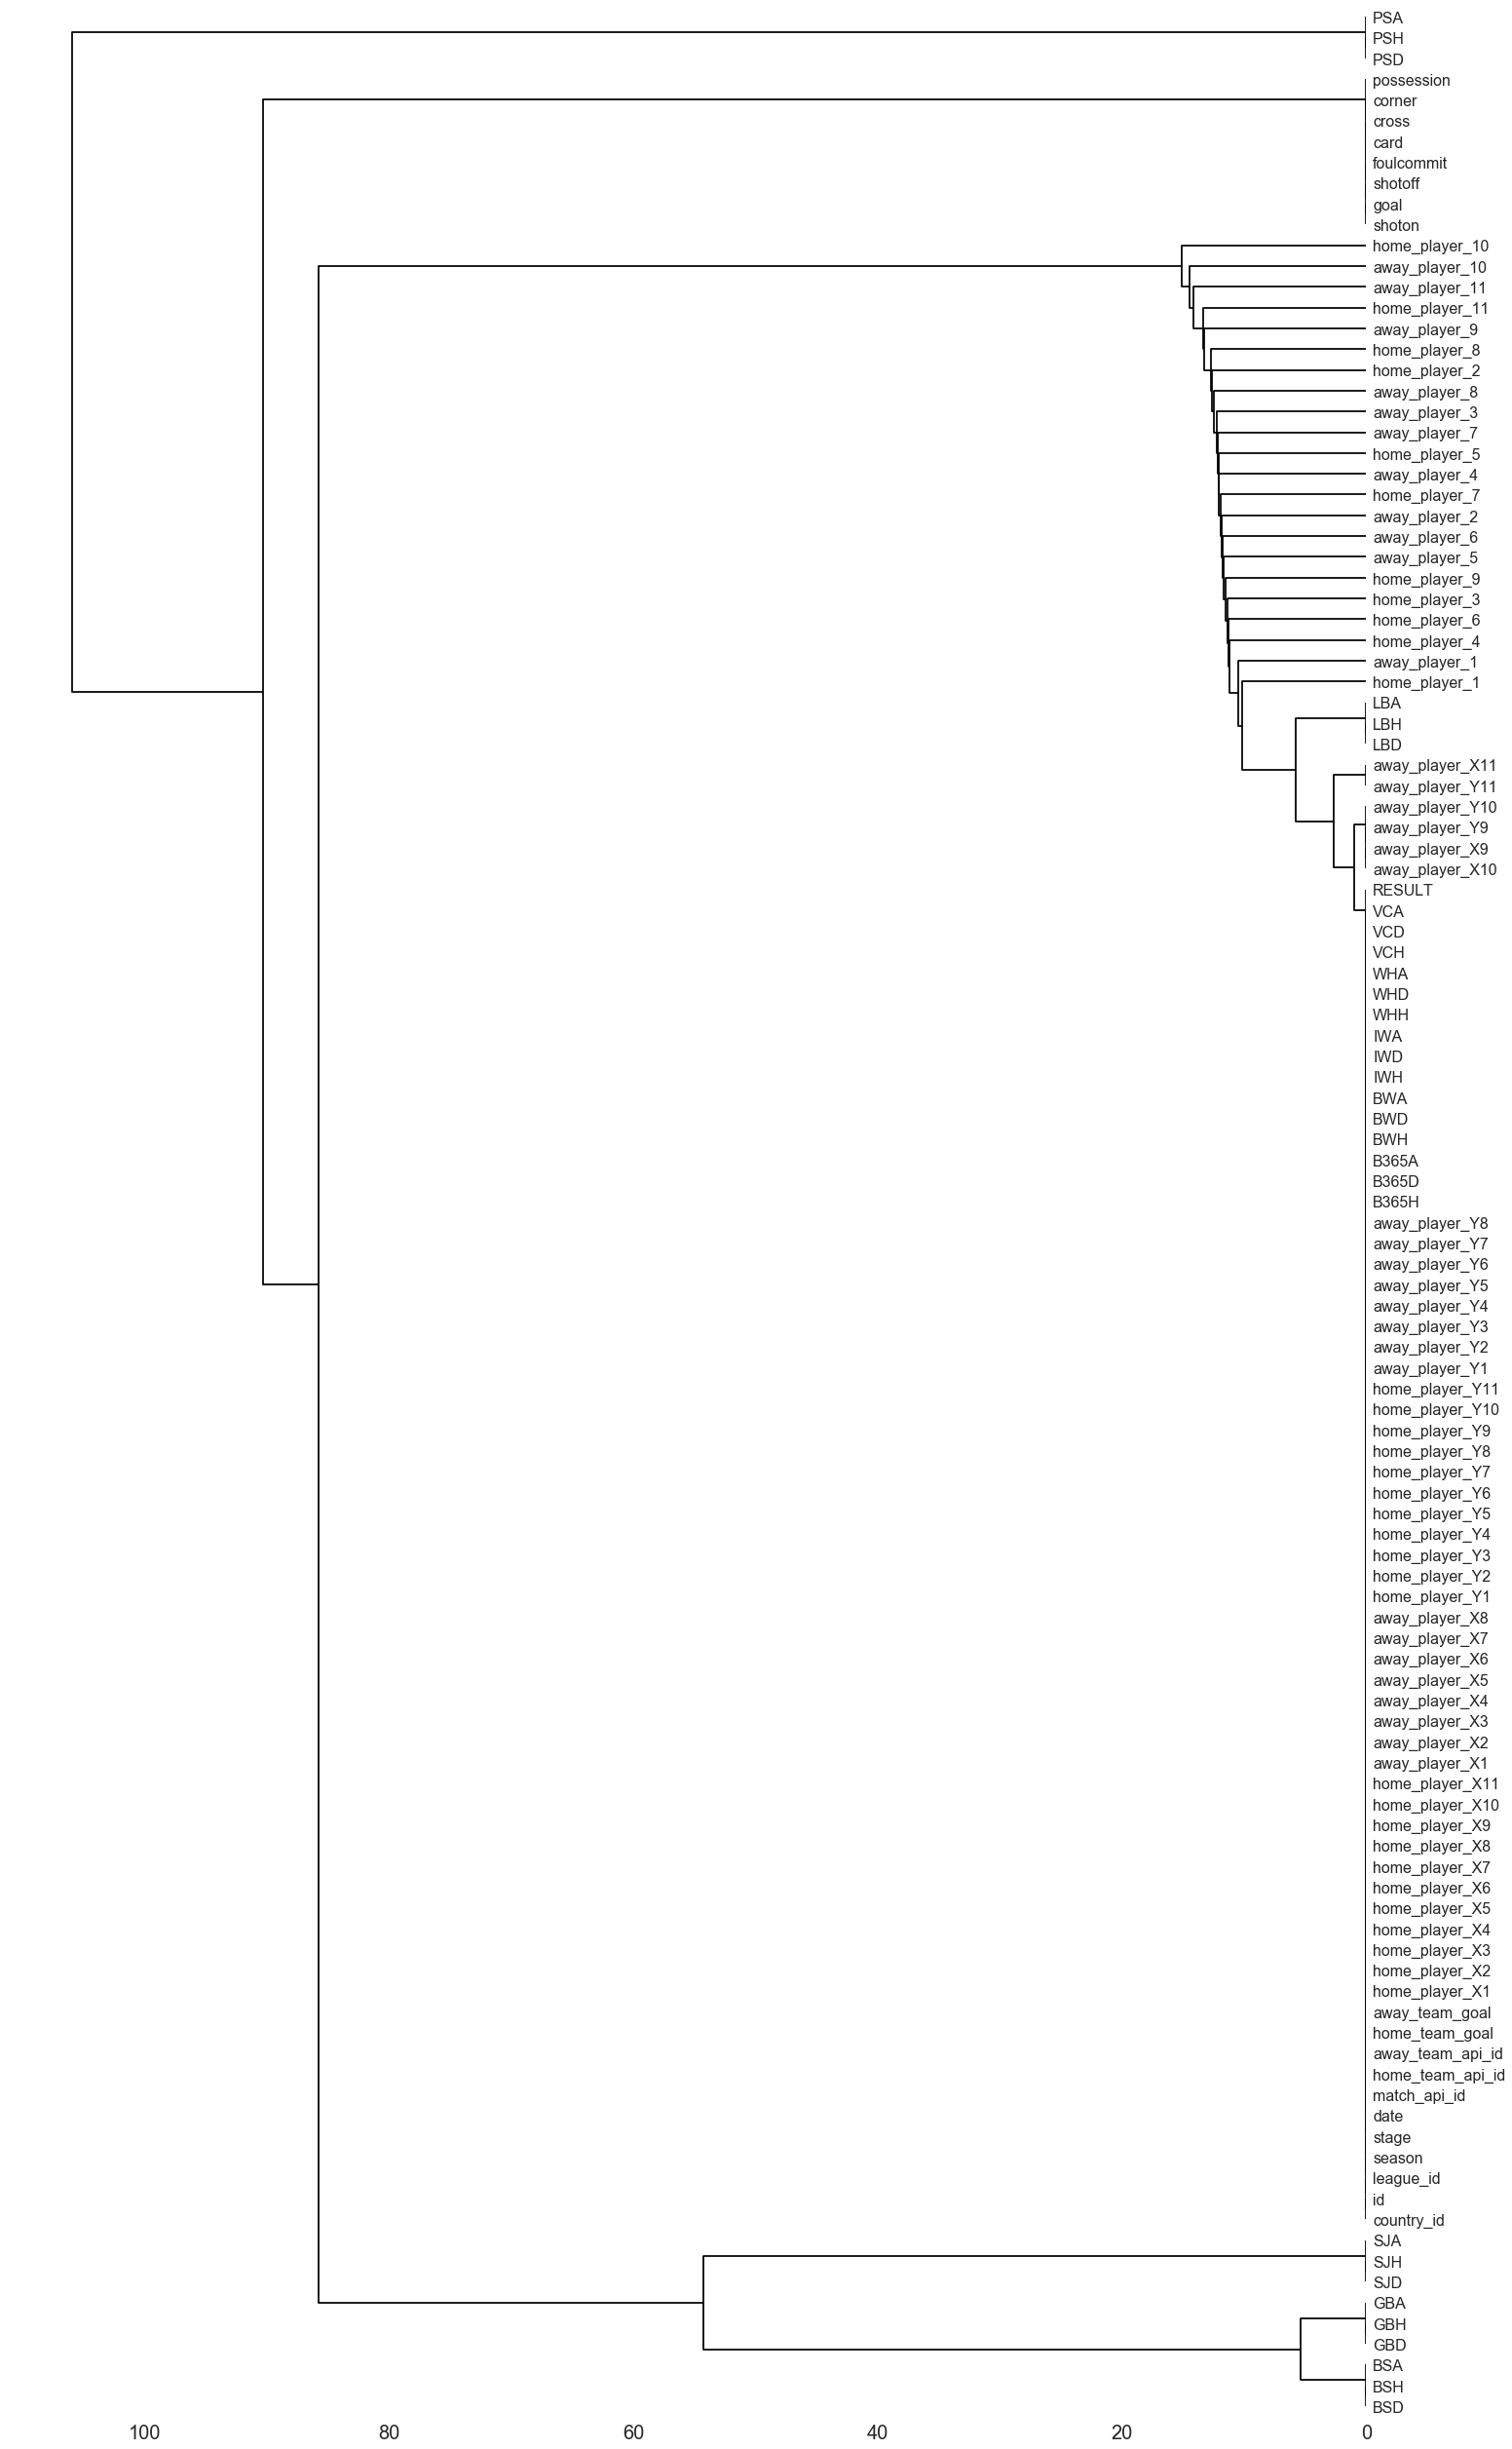

In [259]:
msno.dendrogram(matches_df)

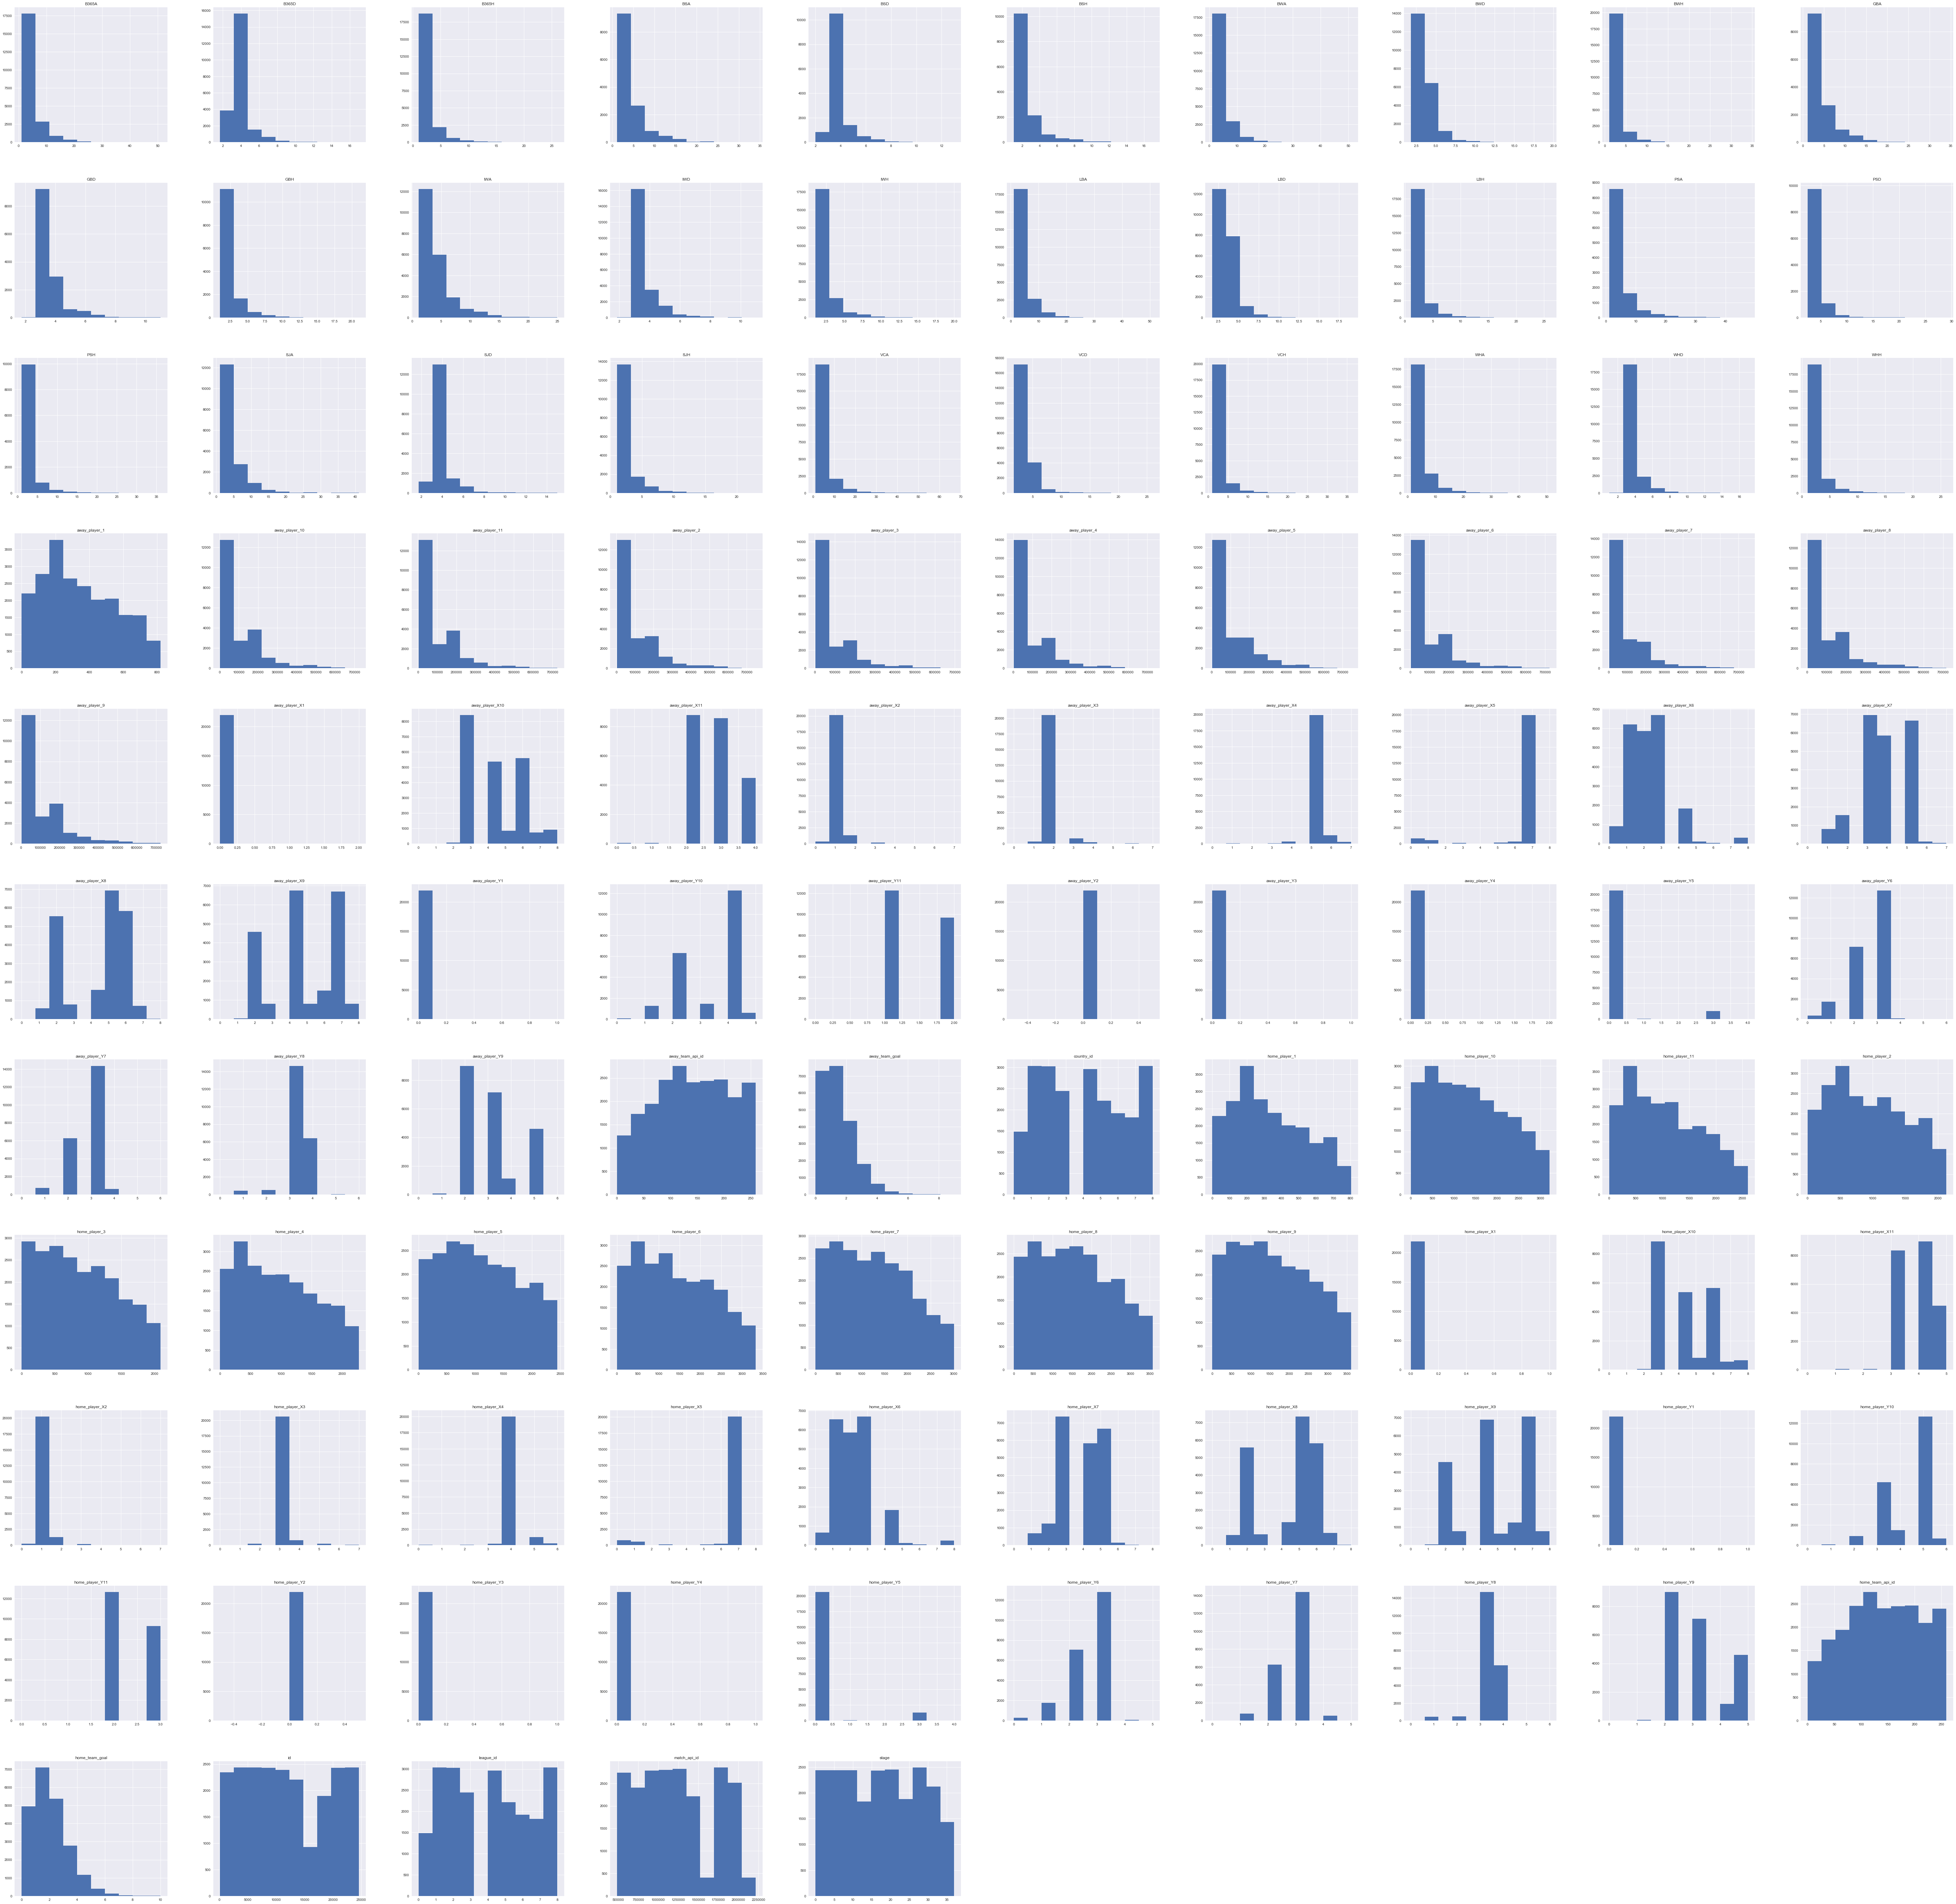

In [348]:
matches_df.hist(figsize = (100, 100))
plt.show()

In [349]:
bookies = ['B365', 'BW', 'IW', 'LB', 'PS', 'WH', 'SJ', 'VC', 'GB', 'BS']
bookies_H = [bookie+'H' for bookie in bookies]
bookies_A = [bookie+'A' for bookie in bookies]
bookies_D = [bookie+'D' for bookie in bookies]
bookies_types = {'Home odds':bookies_H, 'Draw odds':bookies_D, 'Away odds':bookies_A}

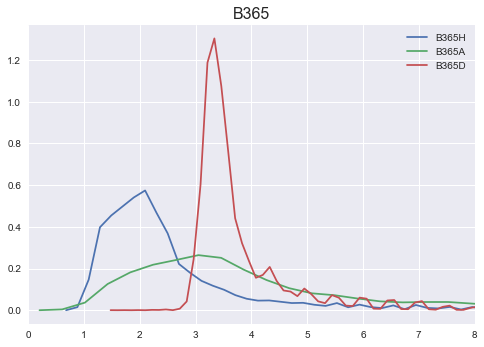

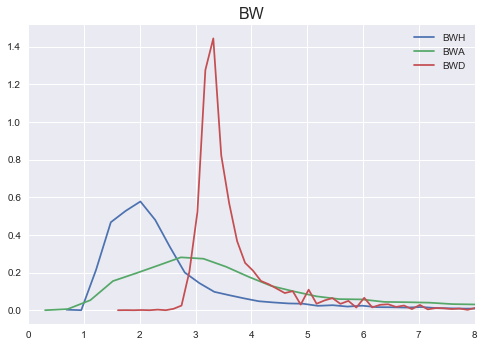

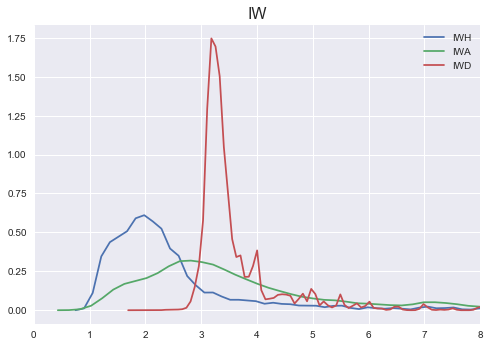

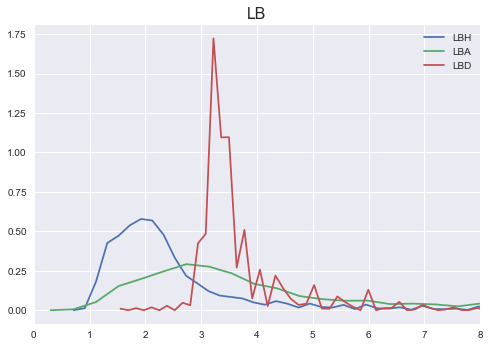

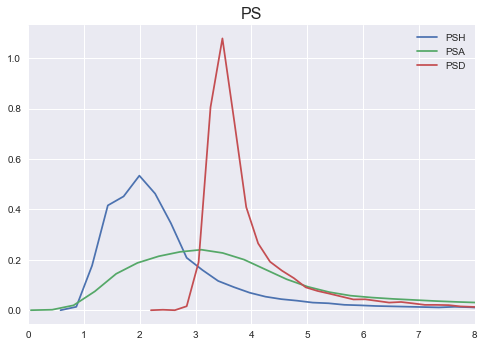

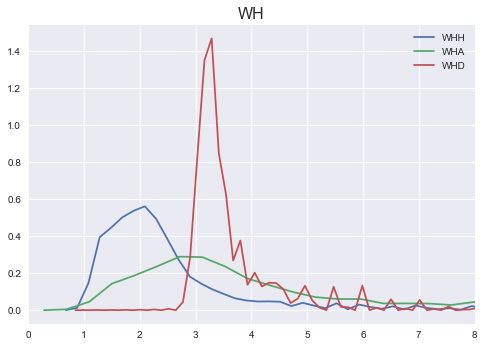

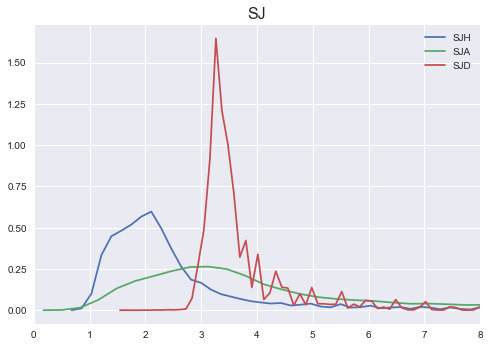

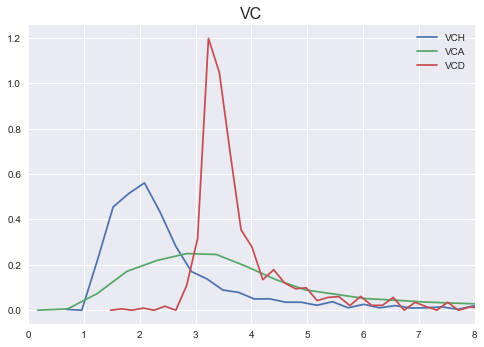

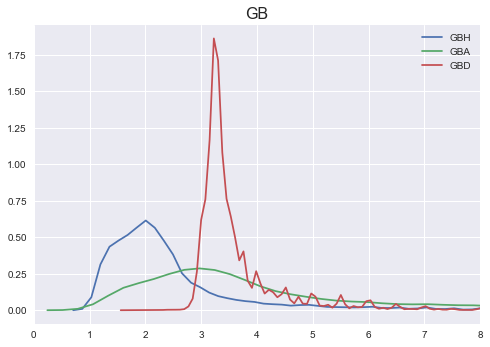

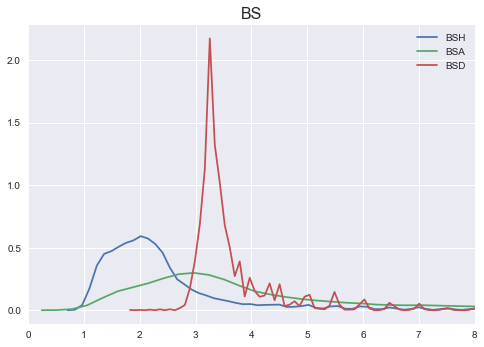

In [355]:
for home, draw, away in zip(bookies_H,bookies_A,bookies_D):
    fig, ax = plt.subplots()
    for odds in [home, draw, away]:
        sns.distplot(matches_df[odds].dropna(), ax=ax, label=odds, hist = False)
    #set title
    plt.title(home[:-1], fontsize=16)
    #remove x label
    ax.set_xlabel('')
    ax.set_xlim([0, 8])
    plt.show()

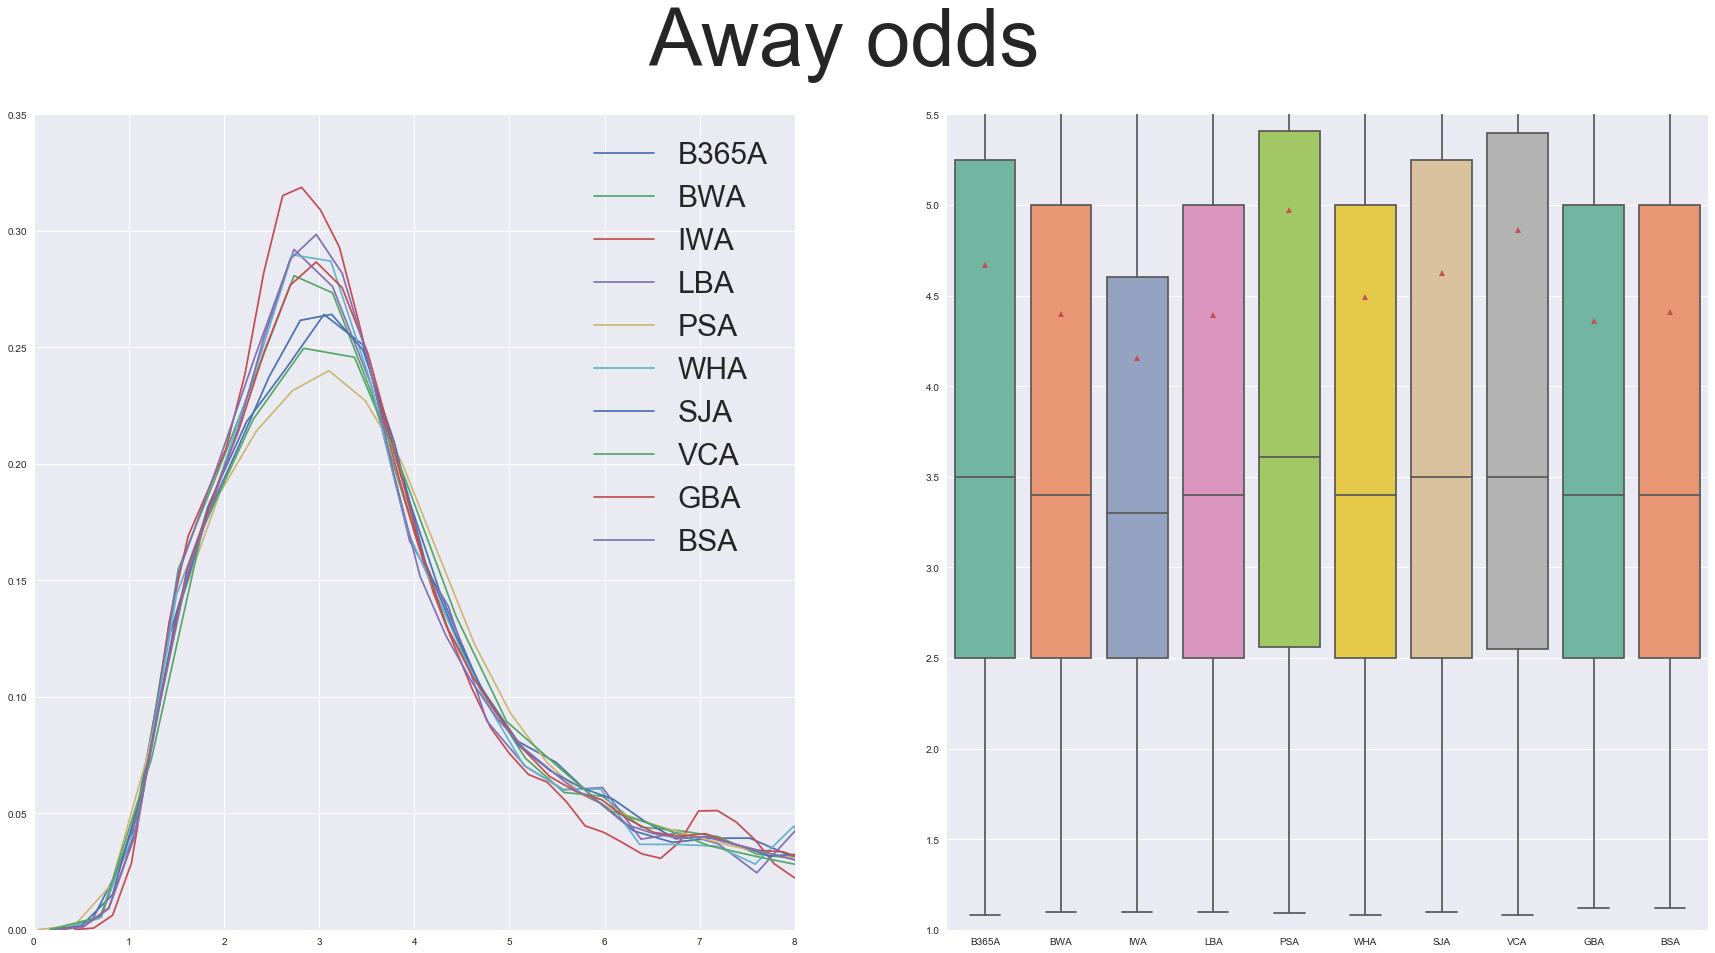

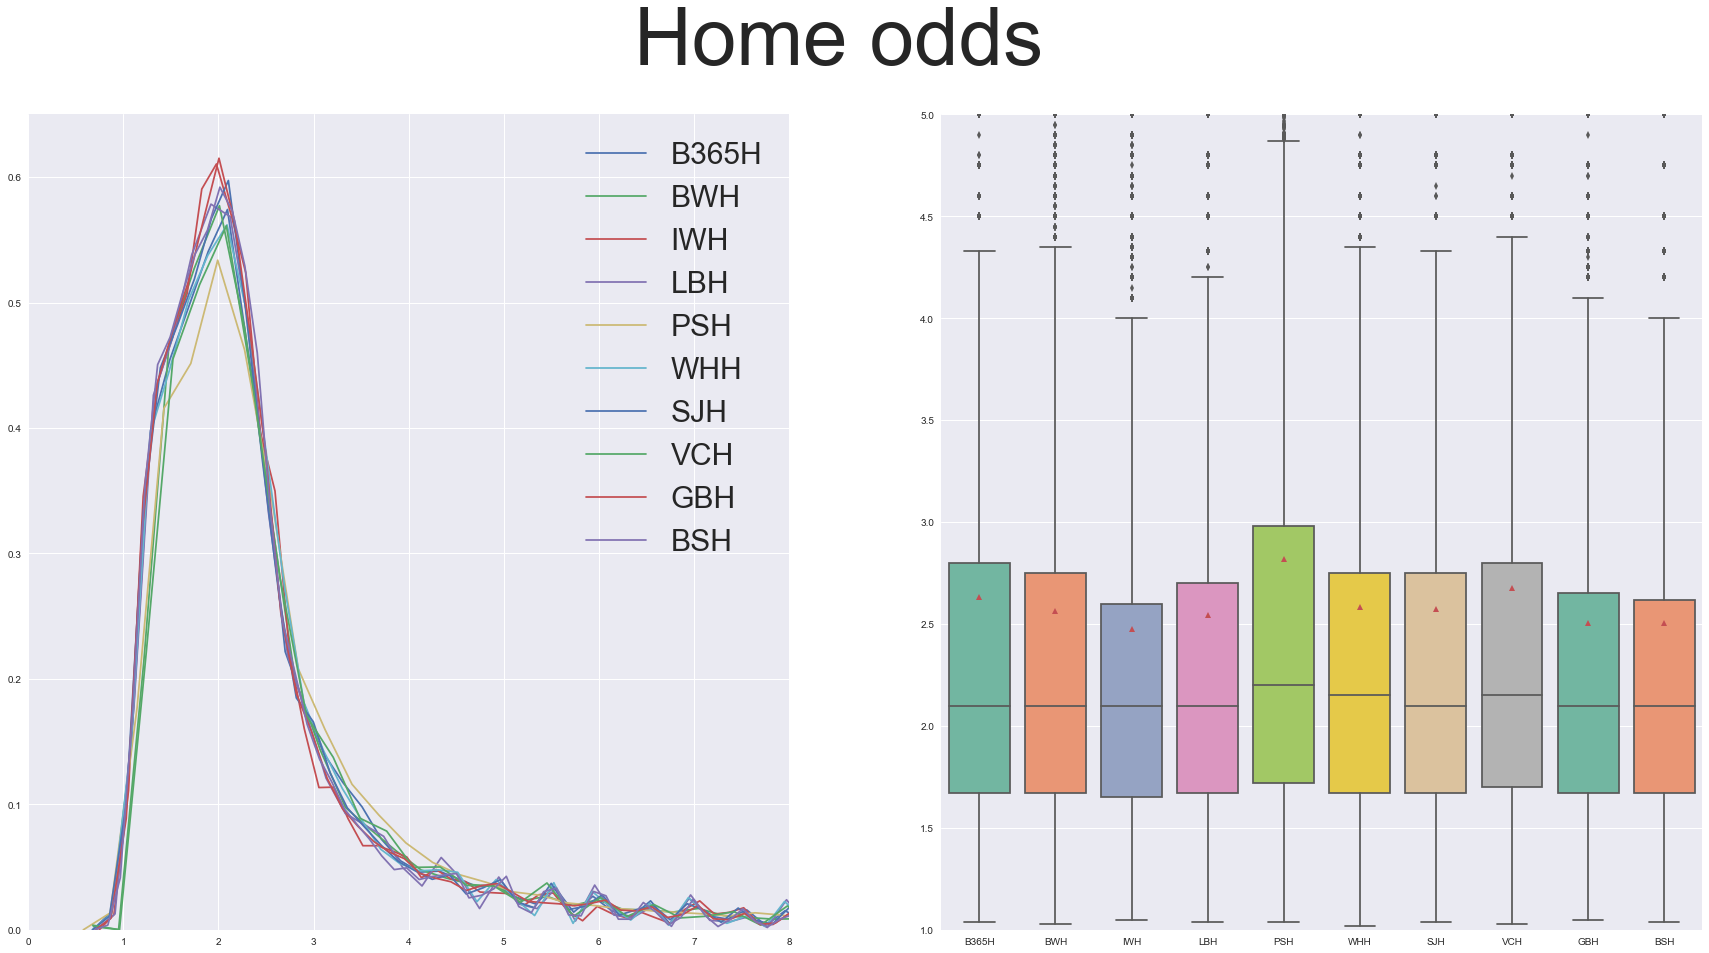

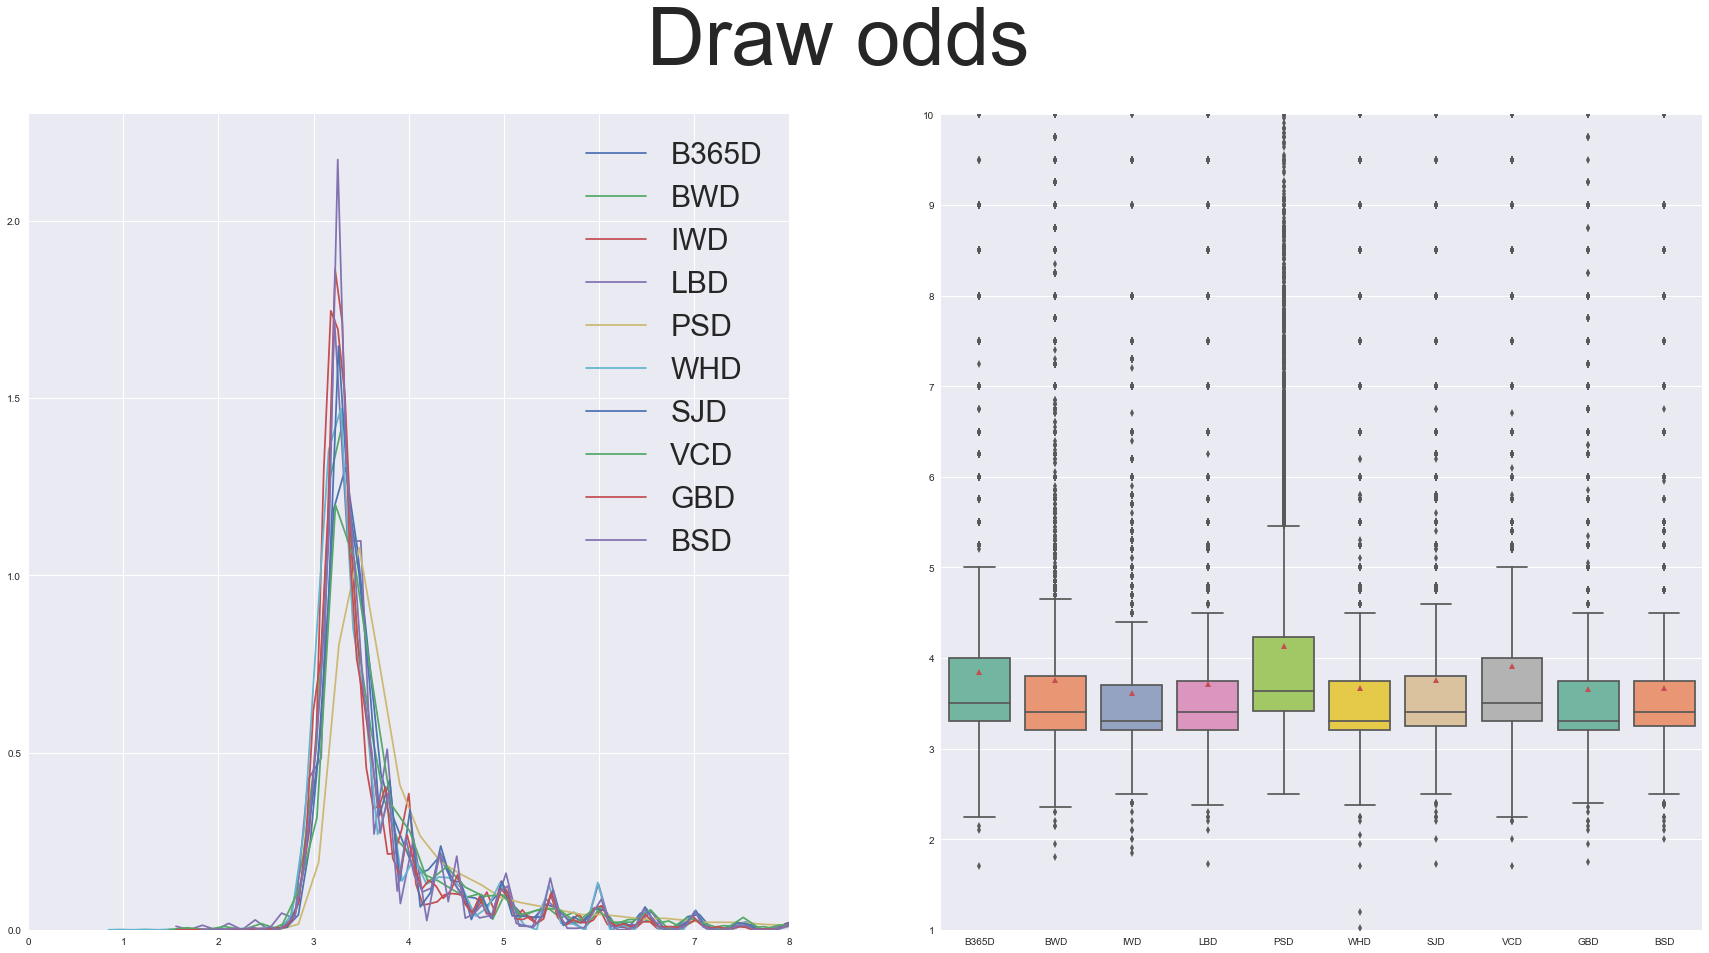

In [390]:
plt.rc('legend',fontsize=30)
#_______All bookmakers - Home/Draw/Away odds | KDE + BOXPLOTS
bookies_types = {'Home odds':bookies_H, 'Draw odds':bookies_D, 'Away odds':bookies_A}
for bookie_type, bookie_list in bookies_types.items():
    fig, axes = plt.subplots(ncols=2, figsize=(30,15))
    axes[0].set_xlim([0, 8])
    if bookie_type=='Home odds':
        axes[0].set_ylim([0, 0.65])
    elif bookie_type =='Draw odds':
        axes[0].set_ylim([0, 2.3])
    else:
        axes[0].set_ylim([0, 0.35])
    for bookie in bookie_list:
        sns.distplot(matches_df[bookie].dropna(), ax = axes[0], label=bookie, hist = False)
    #remove x label
    axes[0].set_xlabel('')
    #locate legend 
    plt.legend(loc='best')
    col_sel = bookie_list
    bookie_sel_df = matches_df[bookie_list]
    axes[1] = sns.boxplot(data=bookie_sel_df, palette='Set2', showmeans=True)
    if bookie_type=='Home odds':
        axes[1].set_ylim([1, 5])
    elif bookie_type =='Draw odds':
        axes[1].set_ylim([1, 10])
    else:
        axes[1].set_ylim([1, 5.5])
    
    plt.suptitle(str(bookie_type), fontsize=80)
    plt.show()

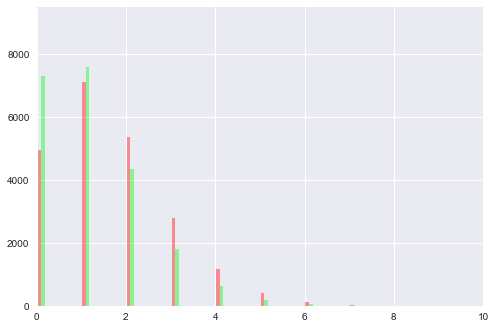

away_team_goal     0     1     2    3    4   5   6  7  8  9
home_team_goal                                             
0               1655  1562  1020  446  192  58  16  4  3  1
1               2223  2528  1415  631  216  64  17  2  1  0
2               1795  1862  1108  403  144  36  14  1  1  0
3                954  1005   519  229   46  15   7  0  0  0
4                452   411   202   76   26   9   0  0  0  0
5                150   155    61   20    4   2   0  0  0  0
6                 55    52    24    3    1   0   1  0  0  0
7                 19    12     1    3    0   0   0  0  0  0
8                  5     3     1    0    0   0   0  0  0  0
9                  1     2     1    0    0   0   0  0  0  0
10                 1     0     1    0    0   0   0  0  0  0


In [386]:
#How many goals - Home\Away
goals_df = matches_df[['home_team_goal', 'away_team_goal']]
color = ['red', 'lime']
fig, ax = plt.subplots()
ax.set_xlim([0, 10])
ax.set_ylim([0, 9500])
sns.distplot(goals_df.dropna(), ax = ax, kde = False, color = color)
plt.show()

#Contingency table
goals_home_vs_away = pd.crosstab(index = matches_df["home_team_goal"],
                                 columns = matches_df["away_team_goal"])
print(goals_home_vs_away)

# FEATURE ENGINEERING<a class="anchor" id="feature-engineering"></a>

In [265]:
#preprocessing libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, Imputer, OneHotEncoder
from imblearn.over_sampling import SMOTE

In [75]:
def impute_numeric (dataset, formula):
    """
    Impute numeric values in a dataset usinng linear regression
    dataset = Pandas Dataframe
    formula e.g. 'Y ~ X1 + X2'
    """
    import statsmodels.formula.api as smf
    import pandas as pd
    
    lm = smf.ols(formula = formula, data = dataset)
    res = lm.fit()
    
    temp_train = dataset[pd.isnull(dataset).any(axis=1)].copy()
    temp_train = temp_train.drop(formula.split(None, 1)[0], axis=1).copy()
    
    var_pred = res.predict(temp_train)
    var_pred = var_pred.round(decimals=0)
    
    dataset[formula.split(None, 1)[0]].fillna(var_pred, inplace=True)

In [216]:
def label_win (row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'WIN'
    if row['home_team_goal'] == row['away_team_goal']:
        return 'DRAW'
    if row['home_team_goal'] < row['away_team_goal']:
        return 'LOSE'

matches_df['RESULT'] = matches_df.apply(lambda row: label_win(row), axis=1)

In [169]:
ml_matches_df = matches_df[[ 'country_id', 'league_id', 'season', 'stage', 'date',
       'home_team_api_id', 'away_team_api_id', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'RESULT']]

In [391]:
#dropping NaNs everywhere where it's <300 records
ml_matches_df.dropna(subset = ['B365H', 'BWH', 'IWH', 'WHH', 'VCH', 'LBH', 'home_team_api_id', 'away_team_api_id', 
        'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
        'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 
        'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 
        'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5',
        'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 
        'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 
        'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
        'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 
        'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 
        'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
        'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 
        'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
        'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
        'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
        'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
        'away_player_8', 'away_player_9', 'away_player_10','away_player_11',
        'home_player_1', 'home_player_2'
                            ], how='any', inplace=True)

KeyError: ['away_player_11home_player_1']

In [225]:
ml_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19561 entries, 145 to 24556
Columns: 104 entries, country_id to RESULT
dtypes: float64(96), int64(5), object(3)
memory usage: 16.3+ MB


In [246]:
#imputation for less popular bookies
bookies_types = {'Home odds':bookies_H, 'Draw odds':bookies_D, 'Away odds':bookies_A}
for bookie_type, bookie_list in bookies_types.items():
    bookie_sel_df = ml_matches_df[bookie_list]
    bookie_sel_df = bookie_sel_df.apply(lambda x: x.fillna(x.mean()),axis=1)
    ml_matches_df[bookie_list]=bookie_sel_df.copy()

     country_id  league_id     season  stage                 date  \
145           1          1  2008/2009     24  2009-02-27 00:00:00   
153           1          1  2008/2009     25  2009-03-08 00:00:00   
155           1          1  2008/2009     25  2009-03-07 00:00:00   
162           1          1  2008/2009     26  2009-03-13 00:00:00   
168           1          1  2008/2009     26  2009-03-14 00:00:00   

     home_team_api_id  away_team_api_id  home_player_X1  home_player_X2  \
145              8203              9987             1.0             2.0   
153              9984              8342             1.0             2.0   
155              8635             10000             1.0             2.0   
162              8203              8635             1.0             2.0   
168             10000              9999             1.0             2.0   

     home_player_X3  home_player_X4  home_player_X5  home_player_X6  \
145             4.0             6.0             8.0            

     country_id  league_id     season  stage                 date  \
145           1          1  2008/2009     24  2009-02-27 00:00:00   
153           1          1  2008/2009     25  2009-03-08 00:00:00   
155           1          1  2008/2009     25  2009-03-07 00:00:00   
162           1          1  2008/2009     26  2009-03-13 00:00:00   
168           1          1  2008/2009     26  2009-03-14 00:00:00   

     home_team_api_id  away_team_api_id  home_player_X1  home_player_X2  \
145              8203              9987             1.0             2.0   
153              9984              8342             1.0             2.0   
155              8635             10000             1.0             2.0   
162              8203              8635             1.0             2.0   
168             10000              9999             1.0             2.0   

     home_player_X3  home_player_X4  home_player_X5  home_player_X6  \
145             4.0             6.0             8.0            

     country_id  league_id     season  stage                 date  \
145           1          1  2008/2009     24  2009-02-27 00:00:00   
153           1          1  2008/2009     25  2009-03-08 00:00:00   
155           1          1  2008/2009     25  2009-03-07 00:00:00   
162           1          1  2008/2009     26  2009-03-13 00:00:00   
168           1          1  2008/2009     26  2009-03-14 00:00:00   

     home_team_api_id  away_team_api_id  home_player_X1  home_player_X2  \
145              8203              9987             1.0             2.0   
153              9984              8342             1.0             2.0   
155              8635             10000             1.0             2.0   
162              8203              8635             1.0             2.0   
168             10000              9999             1.0             2.0   

     home_player_X3  home_player_X4  home_player_X5  home_player_X6  \
145             4.0             6.0             8.0            

In [254]:
#labelling
var_mod = ['country_id', 'league_id', 'season', 'stage', 'date',
       'home_team_api_id', 'away_team_api_id', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
       'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
       'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'RESULT']
le = LabelEncoder()
for i in var_mod:
    mask = ~ml_matches_df[i].isnull()
    ml_matches_df[i][mask] = le.fit_transform(ml_matches_df[i][mask])
ml_matches_df['RESULT'] = ml_matches_df['RESULT'].astype(float)

In [271]:
#scale Features
scaled_features = StandardScaler(with_mean=True, with_std=True).fit_transform(ml_matches_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=ml_matches_df.index, columns=ml_matches_df.columns)

def remap_match_result(x):
    if x < -0.5:
        return -1
    elif x < 0.5:
        return 0
    else:
        return 1
scaled_features_df['RESULT'] = scaled_features_df['RESULT'].map(remap)

scaled_features_df.head()

# MODEL LEARNING<a class="anchor" id="model-learning"></a>

## IMPORTS AND FUNCTIONS<a class="anchor" id="model-learning-top"></a>

In [80]:
# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [81]:
#Split data for train and test
def split_data(data, targ):
    #set target for training
    target = data[targ]

    # Import the train_test_split method
    from sklearn.model_selection import train_test_split
    # Split data into train (3/4th of data) and test (1/4th of data)
    return train_test_split(data, target, train_size = 0.75, random_state=0);

In [82]:
def regr_equation(logreg, train, target):
    if type(model) is LogisticRegression:
        coef = logreg.coef_[0]
        intercept = "{:.2f}".format(logreg.intercept_[0])
    else:
        coef = logreg.coef_
        intercept = "{:.2f}".format(logreg.intercept_)
        
    output = target.name + ' = ' + str(intercept) + ' + '
    coeff_df = pd.DataFrame(train.columns.delete(0))
    coeff_df.columns = ['Feature']
    coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
    features = coeff_df['Feature'].tolist()
    coefficients = coeff_df['Correlation'].tolist()
    
    for coeff, feature in zip(coefficients, features):
        coeff_str = "{:.2f}".format(coeff)
        output += coeff_str + "*" + str(feature) + " + "
    return output[:-3]

In [83]:
def confusion_matrix(model, X, y):
    from sklearn.metrics import confusion_matrix
    return confusion_matrix(y, model.predict(X))

In [327]:
def test_model (model, data, target, submission_name = None, test=None):
   
    if test is None:
        from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
        train, test, target_train, target_test = split_data(data, target)
        train = train.drop('RESULT', 1)
        test = test.drop('RESULT', 1)
        model.fit(train, target_train)
        #Calc parameters
        if type(model) is LogisticRegression:
            function_str = regr_equation(model, train, target_train)
        elif type(model) is LinearRegression:
            function_str = regr_equation(model, train, target_train)
        else :
            function_str = "NA"    

        if type(model) is not LinearRegression:
            trainset_acc = round(accuracy_score(target_train, model.predict(train)) * 100, 2)
            testset_acc = round(accuracy_score(target_test, model.predict(test)) * 100, 2)
            conf_matrix = confusion_matrix(target_train, model.predict(train))
            conf_matrix = 'TN: '+str(conf_matrix[0][0])+', FP: '+str(conf_matrix[0][1])+ \
                              ', FN: '+str(conf_matrix[1][0])+', TP: '+str(conf_matrix[1][1])
        else:
            trainset_acc = 'NA'
            testset_acc = 'NA'
            conf_matrix = "NA"

        r2_score = r2_score(target_train, model.predict(train))
        kaggle = "not_tested"
        
          #Perform k-fold cross-validation with 5 folds
        from sklearn.cross_validation import KFold   #For K-fold cross validation
        kf = KFold(data.shape[0], n_folds=5)
        error = []
        predictors = list(data.columns.values)
        del predictors[-1]
        for train, test in kf:
            # Filter training data
            train_predictors = (data[predictors].iloc[train,:])

            # The target we're using to train the algorithm.
            train_target = data['RESULT'].iloc[train]

            # Training the algorithm using the predictors and target.
            model.fit(train_predictors, train_target)

            #Record error from each cross-validation run
            error.append(model.score(data[predictors].iloc[test,:], data['RESULT'].iloc[test]))

        #Fit the model again so that it can be refered
        #prints
        print("-"*40)
        print('Submission name:', submission_name )
        print('Regression function:\n', function_str)
        print('Accuracy on train set:', trainset_acc,"%")
        print('Accuracy on test set:', testset_acc,"%")
        print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
        print("R2 score:", r2_score)
        print("Confusion matrix:\n", conf_matrix)
        return [submission_name, function_str, str(trainset_acc), str(testset_acc), r2_score, conf_matrix, np.mean(error)]

## SETUP<a class="anchor" id="model-learning-setup"></a>

In [339]:
#Setup
suffix = '_firstTry_droppedMeaningless_StandardScaler_addedParams'
modelMLP = MLPClassifier(hidden_layer_sizes=(104, 104, 104), activation='logistic', solver='sgd', alpha=0.0001, 
                         batch_size='auto', learning_rate='adaptive', learning_rate_init=1, power_t=0.5, 
                         max_iter=2000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                         momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                         beta_1=0.9, beta_2=0.999, epsilon=1e-08)
modelLogReg = LogisticRegression(n_jobs = -1, class_weight='balanced')
modelLinReg = LinearRegression()
modelSVC = SVC()
modellinSVC = LinearSVC()
modelKN = KNeighborsClassifier(n_neighbors = 3)
modelGNB = GaussianNB()
modelPercp = Perceptron()
modelSGD = SGDClassifier()
modelTree = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, 
                                   min_samples_split=16, min_samples_leaf=8, min_weight_fraction_leaf=0.0, 
                                   max_features='sqrt', random_state=None, max_leaf_nodes=None, 
                                   min_impurity_split=1e-07, class_weight=None, presort=False)
modelRndForest = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, 
                                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                        max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                                        n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

modelXTree = ExtraTreesClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=16, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                  max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=False, oob_score=False, 
                                  n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

models = {
          modelRndForest: "RandomForest",
          modelLogReg : "logreg_balanced"
          modelXTree : 'xTrees'
         }

In [340]:
outputs = []
for model, prefix in models.items():
    name=prefix+suffix
    outputs.append(test_model(model, scaled_features_df, target='RESULT', submission_name=name))
outputs.sort(key=lambda x: x[0])

----------------------------------------
Submission name: logreg_balanced_firstTry_droppedMeaningless_StandardScaler_addedParams
Regression function:
 RESULT = -0.85 + -0.01*league_id + -0.01*season + 0.54*stage + 0.02*date + -0.52*home_team_api_id + -0.01*away_team_api_id + -0.00*home_player_X1 + 0.00*home_player_X2 + -0.01*home_player_X3 + 0.00*home_player_X4 + 0.02*home_player_X5 + 0.03*home_player_X6 + 0.14*home_player_X7 + 0.12*home_player_X8 + 0.10*home_player_X9 + 0.17*home_player_X10 + 0.19*home_player_X11 + 0.21*away_player_X1 + 0.00*away_player_X2 + 0.01*away_player_X3 + -0.01*away_player_X4 + 0.02*away_player_X5 + 0.08*away_player_X6 + 0.05*away_player_X7 + -0.01*away_player_X8 + -0.03*away_player_X9 + -0.05*away_player_X10 + 0.00*away_player_X11 + 0.00*home_player_Y1 + 0.00*home_player_Y2 + 0.00*home_player_Y3 + -0.01*home_player_Y4 + -0.11*home_player_Y5 + -0.02*home_player_Y6 + 0.04*home_player_Y7 + 0.03*home_player_Y8 + -0.06*home_player_Y9 + -0.03*home_player_Y10 + 0.04

In [ ]:
for out in outputs:
    super_table.append(out)

In [343]:
make_table(super_table)
apply_theme('basic')

Name,Regression function,Train Acc,Validation Acc,r2_score,conf_matrix,Cross-Valid.
DTree_firstTry_justdroppedAllThere,nan,100.0,100.0,1.0,"TN: 330, FP: 0, FN: 0, TP: 380",0.9971639196497554
LogReg_firstTry_justdroppedAllThere,RESULT = 0.00 + 0.00*country_id + 0.00*league_id + 0.00*season + 0.00*stage + -0.05*date + 0.01*match_api_id + -0.00*home_team_api_id + 0.00*away_team_api_id + -0.00*home_team_goal + 0.42*away_team_goal + -0.87*home_player_X1 + 0.00*home_player_X2 + 0.01*home_player_X3 + -0.02*home_player_X4 + -0.01*home_player_X5 + -0.06*home_player_X6 + -0.02*home_player_X7 + 0.05*home_player_X8 + 0.03*home_player_X9 + 0.01*home_player_X10 + 0.02*home_player_X11 + 0.07*away_player_X1 + 0.00*away_player_X2 + -0.00*away_player_X3 + 0.02*away_player_X4 + -0.03*away_player_X5 + 0.06*away_player_X6 + 0.01*away_player_X7 + 0.05*away_player_X8 + 0.11*away_player_X9 + 0.07*away_player_X10 + -0.01*away_player_X11 + -0.05*home_player_Y1 + 0.00*home_player_Y2 + 0.00*home_player_Y3 + 0.00*home_player_Y4 + 0.00*home_player_Y5 + 0.02*home_player_Y6 + 0.00*home_player_Y7 + -0.08*home_player_Y8 + -0.04*home_player_Y9 + -0.01*home_player_Y10 + -0.04*home_player_Y11 + -0.03*away_player_Y1 + 0.00*away_player_Y2 + 0.00*away_player_Y3 + 0.00*away_player_Y4 + 0.00*away_player_Y5 + -0.01*away_player_Y6 + 0.04*away_player_Y7 + -0.05*away_player_Y8 + 0.00*away_player_Y9 + 0.02*away_player_Y10 + 0.02*away_player_Y11 + 0.07*home_player_1 + 0.00*home_player_2 + 0.00*home_player_3 + -0.00*home_player_4 + 0.00*home_player_5 + -0.00*home_player_6 + -0.00*home_player_7 + -0.00*home_player_8 + 0.00*home_player_9 + -0.00*home_player_10 + 0.00*home_player_11 + -0.00*away_player_1 + -0.00*away_player_2 + 0.00*away_player_3 + -0.00*away_player_4 + -0.00*away_player_5 + -0.00*away_player_6 + -0.00*away_player_7 + 0.00*away_player_8 + -0.00*away_player_9 + 0.00*away_player_10 + 0.00*away_player_11 + -0.00*goal + -0.00*shoton + -0.00*shotoff + -0.00*foulcommit + 0.00*card + -0.00*cross + -0.00*corner + -0.00*possession + -0.00*B365H + 0.11*B365D + 0.05*B365A + 0.09*BWH + 0.03*BWD + -0.01*BWA + -0.01*IWH + -0.05*IWD + -0.01*IWA + -0.03*LBH + 0.01*LBD + -0.02*LBA + 0.01*PSH + 0.00*PSD + -0.00*PSA + 0.00*WHH + 0.01*WHD + 0.00*WHA + 0.03*SJH + -0.02*SJD + 0.02*SJA + 0.01*VCH + -0.05*VCD + 0.00*VCA + -0.05*GBH + 0.03*GBD + -0.01*GBA + -0.01*BSH + -0.05*BSD + 0.07*BSA + 0.00*RESULT,100.0,100.0,1.0,"TN: 330, FP: 0, FN: 0, TP: 380",0.8656563868143188
MLPerc_firstTry_justdroppedAllThere,nan,69.34,48.53,0.06720900266300145,"TN: 212, FP: 71, FN: 48, TP: 290",0.4472685423641514
RandomForest_firstTry_justdroppedAllThere,nan,99.92,96.6,0.9988652177647968,"TN: 330, FP: 0, FN: 0, TP: 379",0.7560294875096576
xTrees_firstTry_justdroppedAllThere,nan,100.0,97.28,1.0,"TN: 330, FP: 0, FN: 0, TP: 380",0.6283109065155807
DTree_firstTry_droppedMeaningless,NA,100.0,100.0,1.0,"TN: 3704, FP: 0, FN: 0, TP: 4234",0.413322131096
LogReg_firstTry_droppedMeaningless,RESULT = 0.00 + -0.00*league_id + -0.00*season + 0.00*stage + -0.00*date + 0.00*home_team_api_id + 0.00*away_team_api_id + 0.00*home_player_X1 + 0.00*home_player_X2 + -0.01*home_player_X3 + -0.01*home_player_X4 + 0.00*home_player_X5 + -0.01*home_player_X6 + 0.01*home_player_X7 + -0.00*home_player_X8 + 0.01*home_player_X9 + -0.01*home_player_X10 + 0.01*home_player_X11 + 0.02*away_player_X1 + 0.00*away_player_X2 + -0.00*away_player_X3 + -0.00*away_player_X4 + 0.01*away_player_X5 + 0.00*away_player_X6 + 0.01*away_player_X7 + -0.00*away_player_X8 + 0.00*away_player_X9 + 0.01*away_player_X10 + 0.00*away_player_X11 + -0.01*home_player_Y1 + 0.00*home_player_Y2 + 0.00*home_player_Y3 + -0.00*home_player_Y4 + -0.00*home_player_Y5 + 0.00*home_player_Y6 + 0.00*home_player_Y7 + 0.01*home_player_Y8 + -0.00*home_player_Y9 + 0.01*home_player_Y10 + 0.01*home_player_Y11 + 0.00*away_player_Y1 + 0.00*away_player_Y2 + 0.00*away_player_Y3 + 0.00*away_player_Y4 + 0.00*away_player_Y5 + 0.01*away_player_Y6 + 0.01*away_player_Y7 + 0.01*away_player_Y8 + 0.

In [344]:
df = pd.DataFrame(super_table[1:], columns=super_table[0])
df.to_csv(r'C:/Users/ernest.chocholowski/Desktop/GIT/SoccerAnalysis/out/results_table.csv', 
                      index=False)